In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read dataset

In [ ]:
ice_creams = pd.read_csv("ice_cream.csv")

In [ ]:
ice_creams

,Unnamed: 0,id,flavour,provenience,sugar_perc,price_class
0,0,1,vanilla,Italy,14.53,cheap
1,1,2,chocolate,Greece,12.17,medium
2,2,3,caramel,Romania,16.15,cheap
3,3,4,pistachio,Spain,10.65,medium
4,4,5,pistachio,Spain,12.23,cheap
...,...,...,...,...,...,...
995,995,996,chocolate,Turkey,4.01,cheap
996,996,997,chocolate,Austria,23.21,medium
997,997,998,pistachio,Switzerland,9.87,cheap
998,998,999,chocolate,Turkey,23.21,cheap


In [ ]:
ice_creams.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
ice_creams

,id,flavour,provenience,sugar_perc,price_class
0,1,vanilla,Italy,14.53,cheap
1,2,chocolate,Greece,12.17,medium
2,3,caramel,Romania,16.15,cheap
3,4,pistachio,Spain,10.65,medium
4,5,pistachio,Spain,12.23,cheap
...,...,...,...,...,...
995,996,chocolate,Turkey,4.01,cheap
996,997,chocolate,Austria,23.21,medium
997,998,pistachio,Switzerland,9.87,cheap
998,999,chocolate,Turkey,23.21,cheap


## Outliere

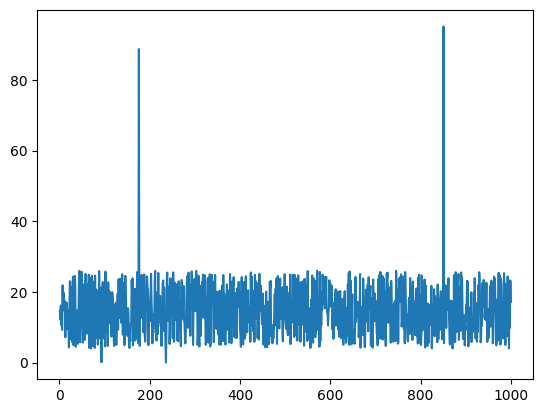

In [ ]:
plt.plot(ice_creams.id, ice_creams.sugar_perc)


In [ ]:
## Valorile care se abat foarte mult de la intervalul in care sunt celelalte valori sunt valori aberante (outliere)

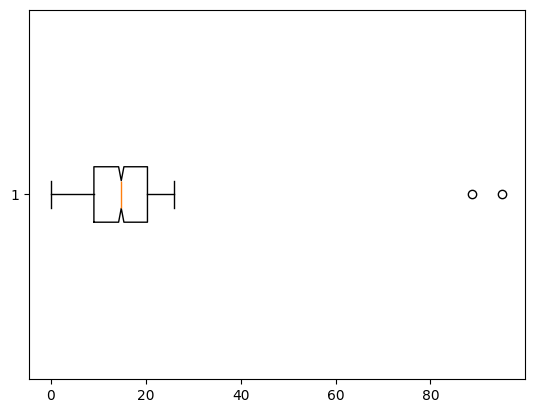

In [ ]:
## Contruim un box plot pentru a observa daca valorile respective sunt outliere
plt.boxplot(x=ice_creams['sugar_perc'], vert=0, notch=True)
plt.show()
## Sunt prezente outliere

In [ ]:
## Avem 2 metode de identificare a outlierelor
## Metoda bazata pe deviatia standard

## Ne alegem un prag in jurul mediei
## Denumim un prag pentru a observa datele care se abat semnificativ de la media cu o valoare mai mare decat k * stddev, respectiv mai mica decat -k * stddev
## Ne construim un interval de incredere in care consideram ca orice valoare in afara lui este outlier

K = 3
def identify_outliers_std(values: pd.Series, k: int):
  ## Calculam media si deviatia standard
  mean = np.mean(values)
  std_dev = np.std(values)
  print(std_dev)
  print(mean)
  ## Ne calculam pragul in jurul mediei
  threshold = k * std_dev


  ## Identificam outlierele
  outliers = [x for x in values if x > (mean + threshold) or x < (mean - threshold)]

  return outliers


outliers = identify_outliers_std(values = ice_creams.sugar_perc, k=K)
print("Outliers: ", outliers)

## Totul este definit in functie de acel prag
## De exemplu daca stabilim un prag mai mic, si anume 2, observam ca avem mai multe valori outliere (acel interval devine mai ingust in jurul mediei)

7.312138481073788
14.881560000000002
Outliers:  [88.7, 95.1]


In [ ]:
## Metoda IQR
def identify_outliers_iqr(values: pd.Series):
  ## Calculam Q1, Q3, limita inferioara si cea si cea superioara
  Q1 = np.percentile(values, 25)
  Q3 = np.percentile(values, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - IQR * 1.5
  upper_bound = Q3 + IQR * 1.5

  ## Identificam outlierele
  outliers = [x for x in values if x < lower_bound or x > upper_bound]

  return outliers

outliers = identify_outliers_iqr(values = ice_creams.sugar_perc)
print("Outliers: ", outliers)

Outliers:  [88.7, 95.1]


In [ ]:
def identify_outliers_iqr(values: pd.Series):
  ## Calculam Q1, Q3, limita inferioara si cea si cea superioara
  Q1 = np.percentile(values, 25)
  Q3 = np.percentile(values, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - IQR * 1.5
  upper_bound = Q3 + IQR * 1.5

  ## Identificam outlierele
  outliers = [(i, x) for i, x in enumerate(values) if x < lower_bound or x > upper_bound]

  return zip(*outliers)


idx, outliers = identify_outliers_iqr(values = ice_creams.sugar_perc)
print("Outliers: ", outliers)
print("Outliers indices: ", idx)
## ice_creams.loc[idx, 'sugar_perc'] = ........

Outliers:  (88.7, 95.1)
Outliers indices:  (175, 850)


In [ ]:
## Cum tratam aceste valori?
## Fie se elimina
## Fie sunt inlocuite cu o valoare relevanta celorlalte precum media si mediana (analog cu imputarea valorilor nule)
## Fie sunt inlocuite cu marginea cea mai apropiata (in cazul variantei bazate pe deviatia standard inlocuite cu mean + k * std, mean - k* std, iar la iqr cu lower bound sau upper bound)

## Encodarea valorilor categorice

In [ ]:
ice_creams.columns

Index(['id', 'flavour', 'provenience', 'sugar_perc', 'price_class'], dtype='object')

In [ ]:
ice_creams.flavour.value_counts()

,count
flavour,
pistachio,257
chocolate,219
peanuts,175
strawberry,158
vanilla,113
caramel,78


In [ ]:
ice_creams.provenience.value_counts()

,count
provenience,
Spain,177
Austria,130
Switzerland,130
Sweden,102
Romania,97
Italy,95
Turkey,82
Greece,62
France,60


In [ ]:
ice_creams.price_class.value_counts()

,count
price_class,
cheap,478
medium,293
expensive,229


In [ ]:
## Encodarea folosind label encoder

In [ ]:
## Vom folosit sklearn pentru a encoda folosind label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
price_encoded = label_encoder.fit_transform(ice_creams.price_class)

In [ ]:
ice_creams['price_encoded'] = price_encoded

In [ ]:
ice_creams

,id,flavour,provenience,sugar_perc,price_class,price_encoded
0,1,vanilla,Italy,14.53,cheap,0
1,2,chocolate,Greece,12.17,medium,2
2,3,caramel,Romania,16.15,cheap,0
3,4,pistachio,Spain,10.65,medium,2
4,5,pistachio,Spain,12.23,cheap,0
...,...,...,...,...,...,...
995,996,chocolate,Turkey,4.01,cheap,0
996,997,chocolate,Austria,23.21,medium,2
997,998,pistachio,Switzerland,9.87,cheap,0
998,999,chocolate,Turkey,23.21,cheap,0


In [ ]:
ice_creams.price_encoded.value_counts()

,count
price_encoded,
0,478
2,293
1,229


In [ ]:
## Avantaje
## Simplu de impelentat, functioneaza bine pe valori categorice de dimensiuni reduse, eficeint computational, e bine de folosit atunci cand encodam un target (rezultat)
## Dezavantaje
## Foarte slab pentru valori categorice de dimensiuni mari -> similar ca si in cazul cu id-urile (un label mai mare ar putea sa aiba o valoare mai mare ca si semnificatie)

In [ ]:
## Encodarea folosind one hot encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder()
flavour_encoded = encoder.fit_transform(ice_creams[['flavour']])

In [ ]:
flavour_encoded

<1000x6 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

In [ ]:
flavour_encoded.toarray()

array([[0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [ ]:
encoded_columns = encoder.get_feature_names_out(['flavour'])
## Creeam un dataframe cu valorile encodate
encoded_df = pd.DataFrame(data = flavour_encoded.toarray(), columns=encoded_columns)

In [ ]:
encoded_df

,flavour_caramel,flavour_chocolate,flavour_peanuts,flavour_pistachio,flavour_strawberry,flavour_vanilla
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
995,0.0,1.0,0.0,0.0,0.0,0.0
996,0.0,1.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,1.0,0.0,0.0
998,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
ice_creams = pd.concat([ice_creams, encoded_df], axis=1)

In [ ]:
ice_creams

,id,flavour,provenience,sugar_perc,price_class,price_encoded,flavour_caramel,flavour_chocolate,flavour_peanuts,flavour_pistachio,flavour_strawberry,flavour_vanilla
0,1,vanilla,Italy,14.53,cheap,0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,chocolate,Greece,12.17,medium,2,0.0,1.0,0.0,0.0,0.0,0.0
2,3,caramel,Romania,16.15,cheap,0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,pistachio,Spain,10.65,medium,2,0.0,0.0,0.0,1.0,0.0,0.0
4,5,pistachio,Spain,12.23,cheap,0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,chocolate,Turkey,4.01,cheap,0,0.0,1.0,0.0,0.0,0.0,0.0
996,997,chocolate,Austria,23.21,medium,2,0.0,1.0,0.0,0.0,0.0,0.0
997,998,pistachio,Switzerland,9.87,cheap,0,0.0,0.0,0.0,1.0,0.0,0.0
998,999,chocolate,Turkey,23.21,cheap,0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
## Avantaje
## Fiecare categorie are propira coloana si astfel informatiile sunt mai clare si interpretabile
## potrivit pentru un numar mic de categorii distincte
## Dezavantaje
## Nepotrivit pentru date cu multe categorii
## In cazul unor seturi de date mari, consuma multa memorie si este incet in procesul de antrenare
## Deoarece majoritatea datelor sunt 0, datele devin sparse, si afecteaza performanta anumitor algoritmi
## Sparsitatea reprezinta o proportie mare de valori 0 (valori lipsa) dintr-un set de date, si afecteaza in mod negativ performata modelelor

In [ ]:
## Encodarea pe baza de frecventa in raport cu targetul (Target Encoder)
provenience_dict = {}
for prov_index in ice_creams.provenience.value_counts().index:
  for price_index in ice_creams.price_class.value_counts().index:
    try:
      provenience_dict[" ".join([price_index, prov_index])] = ice_creams[ice_creams.price_class == price_index].provenience.value_counts()[prov_index] / ice_creams.provenience.value_counts()[prov_index]
    except:
      provenience_dict[" ".join([price_index, prov_index])] = 0

## Cate valori de un tip de target sunt dintr-o valoare a unei coloane categorice in procent din totalul acesteia

In [ ]:
provenience_dict

{'cheap Spain': 0.4689265536723164,
 'medium Spain': 0.288135593220339,
 'expensive Spain': 0.24293785310734464,
 'cheap Austria': 0.5461538461538461,
 'medium Austria': 0.25384615384615383,
 'expensive Austria': 0.2,
 'cheap Switzerland': 0.46923076923076923,
 'medium Switzerland': 0.27692307692307694,
 'expensive Switzerland': 0.25384615384615383,
 'cheap Sweden': 0.43137254901960786,
 'medium Sweden': 0.2647058823529412,
 'expensive Sweden': 0.30392156862745096,
 'cheap Romania': 0.5670103092783505,
 'medium Romania': 0.2268041237113402,
 'expensive Romania': 0.20618556701030927,
 'cheap Italy': 0.42105263157894735,
 'medium Italy': 0.3368421052631579,
 'expensive Italy': 0.24210526315789474,
 'cheap Turkey': 0.4634146341463415,
 'medium Turkey': 0.3170731707317073,
 'expensive Turkey': 0.21951219512195122,
 'cheap Greece': 0.45161290322580644,
 'medium Greece': 0.3709677419354839,
 'expensive Greece': 0.1774193548387097,
 'cheap France': 0.48333333333333334,
 'medium France': 0.35,

In [ ]:
prov_freq = ice_creams[['price_class', 'provenience']].apply(lambda x : provenience_dict.get(" ".join(x)), axis=1)

In [ ]:
prov_freq

,0
0,0.421053
1,0.370968
2,0.567010
3,0.288136
4,0.468927
...,...
995,0.463415
996,0.253846
997,0.469231
998,0.463415


In [ ]:
ice_creams['prov_freq'] = prov_freq

In [ ]:
ice_creams

,id,flavour,provenience,sugar_perc,price_class,price_encoded,flavour_caramel,flavour_chocolate,flavour_peanuts,flavour_pistachio,flavour_strawberry,flavour_vanilla,prov_freq
0,1,vanilla,Italy,14.53,cheap,0,0.0,0.0,0.0,0.0,0.0,1.0,0.421053
1,2,chocolate,Greece,12.17,medium,2,0.0,1.0,0.0,0.0,0.0,0.0,0.370968
2,3,caramel,Romania,16.15,cheap,0,1.0,0.0,0.0,0.0,0.0,0.0,0.567010
3,4,pistachio,Spain,10.65,medium,2,0.0,0.0,0.0,1.0,0.0,0.0,0.288136
4,5,pistachio,Spain,12.23,cheap,0,0.0,0.0,0.0,1.0,0.0,0.0,0.468927
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,chocolate,Turkey,4.01,cheap,0,0.0,1.0,0.0,0.0,0.0,0.0,0.463415
996,997,chocolate,Austria,23.21,medium,2,0.0,1.0,0.0,0.0,0.0,0.0,0.253846
997,998,pistachio,Switzerland,9.87,cheap,0,0.0,0.0,0.0,1.0,0.0,0.0,0.469231
998,999,chocolate,Turkey,23.21,cheap,0,0.0,1.0,0.0,0.0,0.0,0.0,0.463415


In [ ]:
ice_creams.drop(columns=['flavour', 'provenience', 'price_class'], inplace=True)

In [ ]:
ice_creams

,id,sugar_perc,price_encoded,flavour_caramel,flavour_chocolate,flavour_peanuts,flavour_pistachio,flavour_strawberry,flavour_vanilla,prov_freq
0,1,14.53,0,0.0,0.0,0.0,0.0,0.0,1.0,0.421053
1,2,12.17,2,0.0,1.0,0.0,0.0,0.0,0.0,0.370968
2,3,16.15,0,1.0,0.0,0.0,0.0,0.0,0.0,0.567010
3,4,10.65,2,0.0,0.0,0.0,1.0,0.0,0.0,0.288136
4,5,12.23,0,0.0,0.0,0.0,1.0,0.0,0.0,0.468927
...,...,...,...,...,...,...,...,...,...,...
995,996,4.01,0,0.0,1.0,0.0,0.0,0.0,0.0,0.463415
996,997,23.21,2,0.0,1.0,0.0,0.0,0.0,0.0,0.253846
997,998,9.87,0,0.0,0.0,0.0,1.0,0.0,0.0,0.469231
998,999,23.21,0,0.0,1.0,0.0,0.0,0.0,0.0,0.463415
